<a href="https://colab.research.google.com/github/yoooobin/ESAA/blob/main/ESAA_OB_week10_2_markdown.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **2.4** 파이토치 코드 맛보기

- 머신 러닝: 인공지능의 한 분야, 컴퓨터 스스로 대용량 데이터에서 지식이나 패턴을 찾아 학습하고 예측을 수행하는 것

In [1]:
! pip  install --upgrade  matplotlib --use-feature=2020-resolver
! pip  install --upgrade  seaborn  --use-feature=2020-resolver
! pip  install --upgrade  scikit-learn --use-feature=2020-resolver


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

option --use-feature: invalid choice: '2020-resolver' (choose from 'fast-deps', 'truststore', 'no-binary-enable-wheel-cache')

Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

option --use-feature: invalid choice: '2020-resolver' (choose from 'fast-deps', 'truststore', 'no-binary-enable-wheel-cache')

Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [opti

In [2]:
# 필요한 라이브러리 호출
import torch
import torch.nn as nn
import numpy as np    # 벡터 및 행렬 연산에서 매우 편리한 기능을 제공하는 파이젠 라이브러리 패키지
import pandas as pd   # 데이터 처리를 위해 널리 사용되는 파이씬 라01브러리 패키지
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# 데이터 로드
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
dataset = pd.read_csv('/content/drive/MyDrive/ESAA/input/car_evaluation.csv')
dataset.head()

,price,maint,doors,persons,lug_capacity,safety,output
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


- 컴퓨터는 인간의 단어를 인식할 수 없기 때문에 단어를 벡터로 바꾸어 주는 임베딩(embeding) 처리가 필요

<Axes: ylabel='count'>

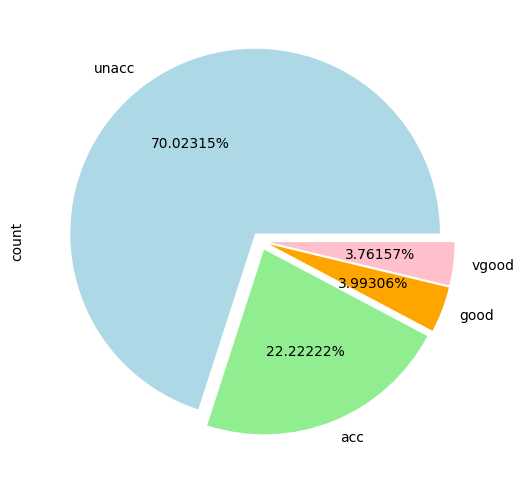

In [5]:
# 예제 데이터셋 분포
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"]  = fig_size
dataset.output.value_counts().plot(kind='pie', autopct= '%0.05f%%',
colors=['lightblue', 'lightgreen', 'orange', 'pink'], explode=(0.05, 0.05, 0.05, 0.05))

- 딥러닝은 통계 알고리즘 기반으로 해서 단어 => 숫자(텐서)
- 데이터 파악 후 분석하기 좋게 고치는 단계 필요 = 데이터 전처리(preprocessing)

In [6]:
# 데이터를 범주형 타입으로 변환
categorical_columns = ['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety']   # 예제 데이터셋 칼럼들의 목록

for column in categorical_columns:
    dataset[column] = dataset[column].astype('category')   # astype() 메서드를 이용하여 데이터를 범주형으로 변환

price = dataset['price'].cat.codes.values ### 1
maint = dataset['maint'].cat.codes.values
doors = dataset['doors'].cat.codes.values
persons = dataset['persons'].cat.codes.values
lug_capacity = dataset['lug_capacity'].cat.codes.values
safety = dataset['safety'].cat.codes.values

categorical_data = np.stack([price, maint, doors, persons, lug_capacity, safety], 1) ### 2
categorical_data[:10]   # 합친 넘파이 배열 중 열 개의 행을 출력하여 보여 줍니다.

array([[3, 3, 0, 0, 2, 1],
       [3, 3, 0, 0, 2, 2],
       [3, 3, 0, 0, 2, 0],
       [3, 3, 0, 0, 1, 1],
       [3, 3, 0, 0, 1, 2],
       [3, 3, 0, 0, 1, 0],
       [3, 3, 0, 0, 0, 1],
       [3, 3, 0, 0, 0, 2],
       [3, 3, 0, 0, 0, 0],
       [3, 3, 0, 1, 2, 1]], dtype=int8)

1. 범주형 데이터를 텐서로 변환하기 위한 절차
    
  **범주형 데이터 ⭢ dataset[category] ⭢ 넘파이 배열(NumPy array) ⭢ 텐서(Tensor)**
- 범주형 데이터(단어)를 숫자(넘파이 배열)로 변환하기 위해 cat.codes 사용
2. np.stack은 두 개 이상의 넘파이 객체를 합칠 때 사용


> ** np.stack 과 np.concatenate
- np.concatenate: 선택한 축(axis)을 기준으로 두 개의 배열을 연결
- np.stack: 배열들을 새로운 축으로 합침 => 반드시 두 배열의 차원이 동일해야 함

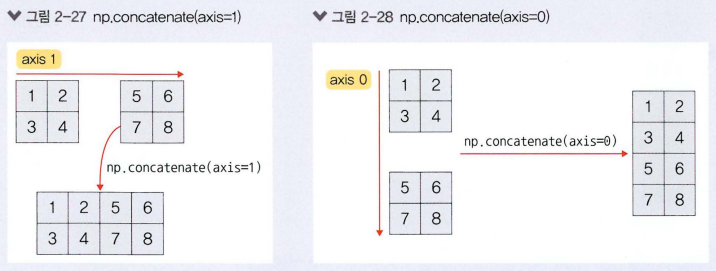

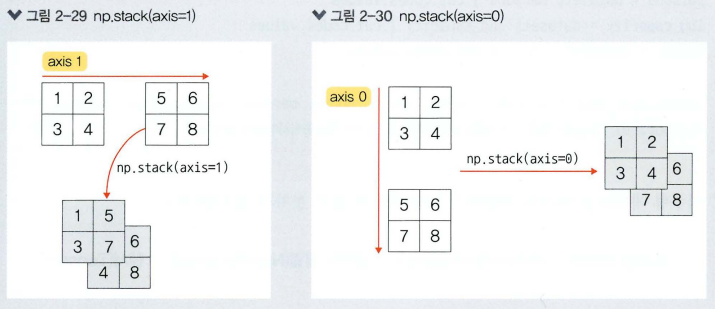

In [7]:
a = np.array([[1, 2], [3, 4]])           # a.shape=(2, 2)
b = np.array([[5, 6], [7, 8]])           # b.shape=(2, 2)
c = np.array([[5, 6], [7, 8], [9, 10]])  # c.shape=(3, 2)

print(np.concatenate((a, b), axis=0))    # shape=(4, 2)
print('-------------------------------')
print(np.stack((a, b), axis=0))          # shape=(2, 2, 2)

[[1 2]
 [3 4]
 [5 6]
 [7 8]]
-------------------------------
[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]


In [8]:
print(np.concatenate((a, c), axis=0))      # shape=(5, 2)
# print(np.stack((a, c), axis=0))          # error

[[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]]


In [9]:
# 배열을 텐서로 변환
categorical_data = torch.tensor(categorical_data, dtype=torch.int64)
categorical_data[:10]

tensor([[3, 3, 0, 0, 2, 1],
        [3, 3, 0, 0, 2, 2],
        [3, 3, 0, 0, 2, 0],
        [3, 3, 0, 0, 1, 1],
        [3, 3, 0, 0, 1, 2],
        [3, 3, 0, 0, 1, 0],
        [3, 3, 0, 0, 0, 1],
        [3, 3, 0, 0, 0, 2],
        [3, 3, 0, 0, 0, 0],
        [3, 3, 0, 1, 2, 1]])

In [10]:
# 레이블로 사용할 칼럼을 텐서로 변환
outputs = pd.get_dummies(dataset.output) ### 1
outputs = outputs.values
outputs = torch.tensor(outputs).flatten()   # 1차원 텐서로 변환

print(categorical_data.shape)
print(outputs.shape)

torch.Size([1728, 6])
torch.Size([6912])


1. get_dummies: 가변수(dummy variable)로 만들어 주는 함수
- 문자 => 숫자 (0,1)

In [11]:
# 성별(gender), 몸무게(weight), 국적(nation) 칼럼을 갖는 배열 생성
import pandas as pd
import numpy as np

data = {
    'gender' : ['male','female','male'],
    'weight' : [72,55,68],
    'nation' : ['Japan','Korea','Australia']
}

df = pd.DataFrame(data)
df

,gender,weight,nation
0,male,72,Japan
1,female,55,Korea
2,male,68,Australia


In [12]:
pd.get_dummies(df)

,weight,gender_female,gender_male,nation_Australia,nation_Japan,nation_Korea
0,72,False,True,False,True,False
1,55,True,False,False,False,True
2,68,False,True,True,False,False




> ** ravel(), reshape(), flatten()
- 텐서의 차원을 바꿀 때 사용




In [13]:
a = np.array([[1, 2],
              [3, 4]])
print(a.ravel())
print(a.reshape(-1))
print(a.flatten())

[1 2 3 4]
[1 2 3 4]
[1 2 3 4]


- 워드 임베딩: 유사한 단어끼리 유사하게 인코딩되도록 표현하는 방법
- 높은 차원의 임베딩일수록 단어 간의 세부적인 관계를 잘 파악할 수 있음 => 단일 숫자로 변환된 넘파이 배열 N차원으로 변경하여 사용

In [14]:
# 범주형 칼럼을 N차원으로 변환
categorical_column_sizes = [len(dataset[column].cat.categories) for column in
                            categorical_columns]
categorical_embedding_sizes = [(col_size, min(50, (col_size+1)//2)) for col_size in
                               categorical_column_sizes]
print(categorical_embedding_sizes)

[(4, 2), (4, 2), (4, 2), (3, 2), (3, 2), (3, 2)]


In [15]:
# 데이터셋 분리
total_records = 1728
test_records = int(total_records * .2)   # 전체 데이터 중 20%를 테스트 용도로 사용

categorical_train_data = categorical_data[:total_records - test_records]
categorical_test_data = categorical_data[total_records - test_records:total_records]
train_outputs = outputs[:total_records - test_records]
test_outputs = outputs[total_records - test_records:total_records]

In [16]:
# 데이터셋 분리 확인
print(len(categorical_train_data))
print(len(train_outputs))
print(len(categorical_test_data))
print(len(test_outputs))

1383
1383
345
345


In [17]:
class Model(nn.Module): ### 1
    def __init__(self, embedding_size, output_size, layers, p=0.4): ### 2
        super().__init__() ### 3
        self.all_embeddings = nn.ModuleList([nn.Embedding(ni, nf) for ni,
                                     nf in embedding_size])
        self.embedding_dropout = nn.Dropout(p)

        all_layers = []
        num_categorical_cols = sum((nf for ni, nf in embedding_size))
        input_size = num_categorical_cols   # 입력층의 크기를 찾기 위해 범주형 칼럼 개수를 input_size 변수에 저장

        for i in layers: ### 4
            all_layers.append(nn.Linear(input_size, i))
            all_layers.append(nn.ReLU(inplace=True))
            all_layers.append(nn.BatchNorm1d(i))
            all_layers.append(nn.Dropout(p))
            input_size = i

        all_layers.append(nn.Linear(layers[-1], output_size))
        self.layers = nn.Sequential(*all_layers)

    def forward(self, x_categorical): ### 5
        embeddings = []
        for i, e in enumerate(self.all_embeddings):
           embeddings.append(e(x_categorical[:,i]))
        x = torch.cat(embeddings, 1)   # 넘파이의 concatenate와 같지만 대상이 텐서
        x = self.embedding_dropout(x)
        x = self.layers(x)

        return x

1. 클래스(class) 형태로 구현되는 모델은 nn.Module을 상속받음
2. __ init __()은 모델에서 사용될 파라미터와 신경망을 초기화하기 위한 용도로 사용, 객체가 생성될 때 자동으로 호출.
  - __ init __()에서 전달되는 매개변수는 아래와 같음
  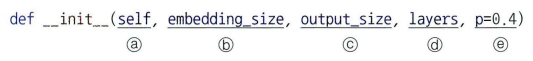

    - (a) self: 첫 번째 파라미터는 self를 지정해야 하고 자기 자신을 의미
    - (b) embedding_size: 범주형 칼럼의 임베딩 크기
    - (c) output_size: 출력층의 크기
    - (d) layers: 모든 계층에 대한 목록
    - (e) p: 드롭아웃 (기본값=0.5)
    
    > ** (a) self의 의미
    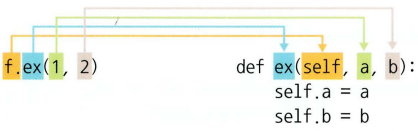

3. super().__ init __()은 부모 클래스(nn.Module)에 접근할 때 사용
4. 모델의 네트워크 계층을 구축하기 위해 for 문을 이용하여 각 계층을 all_layers 목록에 추가
  - Linear: 선형 계층(linear layer)은 입력 데이터에 선형 변환을 진행한 결과
  $$y=Wx+b$$
  $$(y: 선형 계층의 출력 값, W: 가중치, x: 입력 값, b: 바이어스) $$
  - ReLU: 활성화 함수로 사용
  - BatchNorm1d: 배치 정규화(batch normalization) 용도로 사용
  - Dropout: 과적합 방지에 사용
5. forward() 함수는 학습 데이터를 입력받아 연산을 진행. 모델 객체를 데이터와 함께 호출하면 자동으로 실행

In [18]:
# Model 클래스의 객체 생성
model = Model(categorical_embedding_sizes, 4, [200,100,50], p=0.4)
print(model)

Model(
  (all_embeddings): ModuleList(
    (0-2): 3 x Embedding(4, 2)
    (3-5): 3 x Embedding(3, 2)
  )
  (embedding_dropout): Dropout(p=0.4, inplace=False)
  (layers): Sequential(
    (0): Linear(in_features=12, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=50, bias=True)
    (9): ReLU(inplace=True)
    (10): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dropout(p=0.4, inplace=False)
    (12): Linear(in_features=50, out_features=4, bias=True)
  )
)


- 모델 훈련시키기 전 손실 함수와 옵티마이저에 대해 정의
- 크로스 엔트로피(cross entropy) 손실 함수, 옵티마이저로 아담(Adam) 사용

In [19]:
# 모델의 파라미터 정의
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [20]:
# CPU/GPU 사용 지정
if torch.cuda.is_available():
   device = torch.device('cuda')   # GPU가 있다면 GPU를 사용
else:
   device = torch.device('cpu')    # GPU가 없다면 CPU를 사용

In [21]:
# 모델 학습
epochs = 500
aggregated_losses = []
train_outputs = train_outputs.to(device=device, dtype=torch.int64)
for i in range(epochs):   # for문은 500회 반복되며, 각 반복마다 손실 함수가 오차를 계산
    i += 1
    y_pred = model(categorical_train_data).to(device)
    single_loss = loss_function(y_pred, train_outputs)
    aggregated_losses.append(single_loss)   # 반복할 때마다 오차를 aggregated_losses에 추가

    if i%25 == 1:
        print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

    optimizer.zero_grad()
    single_loss.backward()   # 가중치를 업데이트하기 위해 손실 함수의 backward() 메서드 호출
    optimizer.step()   # 옵티마이저 함수의 step() 메서드를 이용하여 기울기 업데이트


print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')   # 오차가 25 에포크마다 출력

epoch:   1 loss: 1.60322607
epoch:  26 loss: 1.44084811
epoch:  51 loss: 1.32758796
epoch:  76 loss: 1.21296048
epoch: 101 loss: 1.08208966
epoch: 126 loss: 0.94207519
epoch: 151 loss: 0.83493525
epoch: 176 loss: 0.74673039
epoch: 201 loss: 0.70064849
epoch: 226 loss: 0.66169149
epoch: 251 loss: 0.63506085
epoch: 276 loss: 0.62214130
epoch: 301 loss: 0.60443830
epoch: 326 loss: 0.59813929
epoch: 351 loss: 0.59873080
epoch: 376 loss: 0.58861840
epoch: 401 loss: 0.58560675
epoch: 426 loss: 0.57777649
epoch: 451 loss: 0.57678986
epoch: 476 loss: 0.56899738
epoch: 500 loss: 0.5619004965


In [22]:
# 테스트 데이터셋으로 모델 예측
test_outputs = test_outputs.to(device=device, dtype=torch.int64)
with torch.no_grad():
     y_val = model(categorical_test_data)
     loss = loss_function(y_val, test_outputs)
print(f'Loss: {loss:.8f}')

Loss: 0.55723274


In [23]:
# 모델의 예측 확인
print(y_val[:5])

tensor([[ 3.1801,  1.8166, -3.7536, -3.5907],
        [ 2.8945,  1.6476, -3.3481, -3.3532],
        [ 5.7041,  3.8763, -6.7090, -7.0643],
        [ 4.3436,  3.4177, -5.7653, -6.6263],
        [ 2.6212,  1.5492, -3.4129, -3.3068]])


In [24]:
# 가장 큰 값을 갖는 인덱스 확인
y_val = np.argmax(y_val, axis=1)
print(y_val[:5])

tensor([0, 0, 0, 0, 0])


In [25]:
# 테스트 데이터셋을 이용한 정확도 확인
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(test_outputs,y_val) )
print(classification_report(test_outputs,y_val))
print(accuracy_score(test_outputs,y_val))

[[259   0]
 [ 86   0]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86       259
           1       0.00      0.00      0.00        86

    accuracy                           0.75       345
   macro avg       0.38      0.50      0.43       345
weighted avg       0.56      0.75      0.64       345

0.7507246376811594


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


- True Positive: 모델(분류기)='1' 예측, 실제 값='1'인 경우
- True Negative: 모델(분류기)='0' 예측, 실제 값='0'인 경우
- False Positive: 모델(분류기)='1' 예측, 실제 값='0'인 경우 (Type I 오류)
- False Negative: 모델(분류기)= '0' 예측, 실제 값='1'인 경우 (Type II 오류)

**딥러닝 분류 모델 성능 평가 지표**

  - 정확도(accuracy)
    - 전체 예측 건수에서 정답을 맞힌 건수의 비율
    - 정답이 긍정(positive)이든 부정(negative)이든 상관없음

    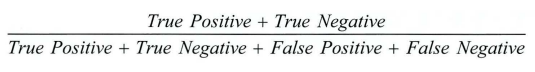


  - 재현율(recall)
    - 실제로 정답이 1이라고 할 때 모델(분류기)도 1로 예측한 비율
    - 처음부터 데이터가 1일 확률이 적을 때 사용하면 좋음
    
    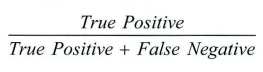
  


  - 정밀도(precision)
    - 모델(분류기)이 1이라고 예측한 것 중에서 실제로 정답이 1인 비율

    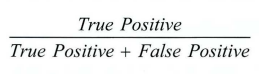


  - F1-스코어(F1-score)
    - 정밀도와 재현율의 트레이드오프(trade-off) 관계를 해결하려고 정밀도와 재현율의 조화 평균(harmonic mean)을 이용한 것
    
    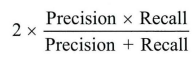